Setup the Spark environment in Google Collab

In [ ]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and extract Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"
os.environ["PYSPARK_PYTHON"] = "python3"

# Find and initialise Spark
import findspark
findspark.init()

# Start a Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
	    .master("local[*]") \
	    .appName("Spark_Colab") \
	    .getOrCreate()

# Test Spark session
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



Setup a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
	  .master("local")\
	  .appName("colab")\
	  .config('spark.ui.port', '4050')\
	  .getOrCreate()

spark

Import the dataset ("CSV file from database table)

In [ ]:
# Read CSV file into DataFrame
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Print uploaded file name(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving ProdLine300M01Stn23-month.csv to ProdLine300M01Stn23-month.csv
Uploaded file: ProdLine300M01Stn23-month.csv


Create a dataframe showing the data content

In [ ]:
# Install the pandas library

import pandas as pd

df = pd.read_csv('ProdLine300M01Stn23-month.csv')

# Display the dataframe

print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'ProdLine300M01Stn23-month.csv'

Check the datatype of each column


In [ ]:
#Check the datatype of each column

column_datatypes = df.dtypes

#Print the data type for each column

print(column_datatypes)

ID                                     int64
DateStamp                             object
ProductProg                            int64
PID                                    int64
DeltaVoltage_L_H1                      int64
                                       ...  
Delta_V_Pot_Too_Small_Rejects_R_H4     int64
Delta_V_Pot_Too_Small_Rejects_R_H5     int64
Delta_V_Pot_Too_Small_Rejects_R_H6     int64
Delta_V_Pot_Too_Small_Rejects_R_H7     int64
Delta_V_Pot_Too_Small_Rejects_R_H8     int64
Length: 457, dtype: object


List all the columns in the dataframe

In [ ]:

column_list = df.columns.tolist()
print("Columns in the DataFrame:")
print(column_list)


Columns in the DataFrame:
['ID', 'DateStamp', 'ProductProg', 'PID', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPosn_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPosn_P1_R_H1', 'PotPosn_P2_R_H1', 'Avg_Inom_L_H1', 'Avg_Inom_R_H1', 'Avg_Islip_L_H1', 'Avg_Islip_R_H1', 'PotContactOK_L_H1', 'PotContactOK_R_H1', 'Fail_Spike_L_H1', 'Fail_Spike_R_H1', 'Fail_Timeout_L_H1', 'Fail_Timeout_R_H1', 'Fail_DeltaVTooSmall_L_H1', 'Fail_DeltaVTooSmall_R_H1', 'Fail_PotVTooBig_L_H1', 'Fail_PotVTooBig_R_H1', 'Fail_PotVTooSmall_L_H1', 'Fail_PotVTooSmall_R_H1', 'Fail_No_Islip_L_H1', 'Fail_No_Islip_R_H1', 'Fail_MidPosn_L_H1', 'Fail_MidPosn_R_H1', 'Fail_0V_OnPot_L_H1', 'Fail_0V_OnPot_R_H1', 'Fail_PotCntctCylNotDwn_H1', 'Fail_MotorCntctCylNotDwn_H1', 'Fail_MotorContact_H1', 'Fail_L_H1', 'Fail_R_H1', 'Reject_H1', 'DeltaVoltage_L_H2', 'DeltaVoltage_R_H2', 'MidPosn_L_H2', 'MidPosn_R_H2', 'PotPosn_P1_L_H2', 'PotPosn_P2_L_H2', 'PotPosn_P1_R_H2', 'PotPosn_P2_R_H2', 'Avg_Inom_L_H2', 'Avg_Inom_R_H2

DateStamp is an object data type and will be changed to datetime format

Change each of the boolean data types to 0 - False, 1 - True

In [ ]:
#list all boolean columns

boolean_columns = df.select_dtypes(include='bool').columns

#print columns with boolean data type

print("Columns with boolean data type:")

for col in boolean_columns:
  print(col)


Columns with boolean data type:
PotContactOK_L_H1
PotContactOK_R_H1
Fail_Spike_L_H1
Fail_Spike_R_H1
Fail_Timeout_L_H1
Fail_Timeout_R_H1
Fail_DeltaVTooSmall_L_H1
Fail_DeltaVTooSmall_R_H1
Fail_PotVTooBig_L_H1
Fail_PotVTooBig_R_H1
Fail_PotVTooSmall_L_H1
Fail_PotVTooSmall_R_H1
Fail_No_Islip_L_H1
Fail_No_Islip_R_H1
Fail_MidPosn_L_H1
Fail_MidPosn_R_H1
Fail_0V_OnPot_L_H1
Fail_0V_OnPot_R_H1
Fail_PotCntctCylNotDwn_H1
Fail_MotorCntctCylNotDwn_H1
Fail_MotorContact_H1
Fail_L_H1
Fail_R_H1
Reject_H1
PotContactOK_L_H2
PotContactOK_R_H2
Fail_Spike_L_H2
Fail_Spike_R_H2
Fail_Timeout_L_H2
Fail_Timeout_R_H2
Fail_DeltaVTooSmall_L_H2
Fail_DeltaVTooSmall_R_H2
Fail_PotVTooBig_L_H2
Fail_PotVTooBig_R_H2
Fail_PotVTooSmall_L_H2
Fail_PotVTooSmall_R_H2
Fail_No_Islip_L_H2
Fail_No_Islip_R_H2
Fail_MidPosn_L_H2
Fail_MidPosn_R_H2
Fail_0V_OnPot_L_H2
Fail_0V_OnPot_R_H2
Fail_PotCntctCylNotDwn_H2
Fail_MotorCntctCylNotDwn_H2
Fail_MotorContact_H2
Fail_L_H2
Fail_R_H2
Reject_H2
PotContactOK_L_H3
PotContactOK_R_H3
Fail_Spike_L_H

In [ ]:
#convert boolean data type to int

df[boolean_columns] = df[boolean_columns].astype(int)

print

#print dataframe after conversion

print(df)

            ID                    DateStamp  ProductProg  PID  \
0      3614236  2023-01-31 23:50:55.0870000        18499   19   
1      3614235  2023-01-31 23:50:00.5870000        18499   17   
2      3614234  2023-01-31 23:49:42.2270000        18499    6   
3      3614233  2023-01-31 23:48:29.9370000        18499   27   
4      3614232  2023-01-31 23:47:35.7730000        18499   25   
...        ...                          ...          ...  ...   
46152  3568084  2023-01-04 22:51:11.4900000        20561    5   
46153  3568083  2023-01-04 22:50:54.7730000        20561   10   
46154  3568082  2023-01-04 22:49:51.6800000        20561   37   
46155  3568081  2023-01-04 22:49:09.3370000        20561   32   
46156  3568080  2023-01-04 22:48:48.4670000            0   34   

       DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H1  \
0                      0                  0             0             0   
1                    416                  0           250            

Check to make sure no boolean data type columns remain in dataframe

In [ ]:
#list all boolean columns after convert complete

boolean_columns = df.select_dtypes(include='bool').columns

#print columns with boolean data type

print("Columns with boolean data type:")

for col in boolean_columns:
  print(col)

Columns with boolean data type:


No further boolean data type columns in dataframe.

Next convert the DateStamp column to datetime

In [ ]:
df['DateStamp'] = pd.to_datetime(df['DateStamp'])

#check the dateframe after the conversion

print(df)

            ID               DateStamp  ProductProg  PID  DeltaVoltage_L_H1  \
0      3614236 2023-01-31 23:50:55.087        18499   19                  0   
1      3614235 2023-01-31 23:50:00.587        18499   17                416   
2      3614234 2023-01-31 23:49:42.227        18499    6                  0   
3      3614233 2023-01-31 23:48:29.937        18499   27                423   
4      3614232 2023-01-31 23:47:35.773        18499   25                  0   
...        ...                     ...          ...  ...                ...   
46152  3568084 2023-01-04 22:51:11.490        20561    5                397   
46153  3568083 2023-01-04 22:50:54.773        20561   10                  0   
46154  3568082 2023-01-04 22:49:51.680        20561   37                426   
46155  3568081 2023-01-04 22:49:09.337        20561   32                434   
46156  3568080 2023-01-04 22:48:48.467            0   34                  0   

       DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H

Check the data types again

In [ ]:
#Check the datatype of each column

column_datatypes = df.dtypes

#Print the data type for each column

print(column_datatypes)

ID                                             int64
DateStamp                             datetime64[ns]
ProductProg                                    int64
PID                                            int64
DeltaVoltage_L_H1                              int64
                                           ...      
Delta_V_Pot_Too_Small_Rejects_R_H4             int64
Delta_V_Pot_Too_Small_Rejects_R_H5             int64
Delta_V_Pot_Too_Small_Rejects_R_H6             int64
Delta_V_Pot_Too_Small_Rejects_R_H7             int64
Delta_V_Pot_Too_Small_Rejects_R_H8             int64
Length: 457, dtype: object


Preprocess the dataset

Check the dataset statistically

In [ ]:
description = df.describe()

#print the description

print(description)

                 ID                      DateStamp   ProductProg  \
count  4.615700e+04                          46157  46157.000000   
mean   3.591158e+06  2023-01-18 03:06:53.011933696  19640.458284   
min    3.568080e+06     2023-01-04 22:48:48.467000      0.000000   
25%    3.579619e+06  2023-01-11 03:52:40.643000064  18499.000000   
50%    3.591158e+06  2023-01-17 03:33:14.107000064  20547.000000   
75%    3.602697e+06  2023-01-26 11:05:47.710000128  20553.000000   
max    3.614236e+06     2023-01-31 23:50:55.087000  22873.000000   
std    1.332452e+04                            NaN   1434.688183   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  46157.000000       46157.000000       46157.000000  46157.000000   
mean      20.265399         346.082003         198.771952    207.238425   
min        0.000000           0.000000           0.000000      0.000000   
25%       10.000000         417.000000           0.000000    250.000000   
50%       20

Remove rows where the PID (Pallet ID) is equal to zero


In [ ]:
# Drop rows where PID equals zero False values

column_to_check = 'PID'

df = df[df[column_to_check] != 0]

#Check dataframe after dropping rows
print(df)

            ID               DateStamp  ProductProg  PID  DeltaVoltage_L_H1  \
0      3614236 2023-01-31 23:50:55.087        18499   19                  0   
1      3614235 2023-01-31 23:50:00.587        18499   17                416   
2      3614234 2023-01-31 23:49:42.227        18499    6                  0   
3      3614233 2023-01-31 23:48:29.937        18499   27                423   
4      3614232 2023-01-31 23:47:35.773        18499   25                  0   
...        ...                     ...          ...  ...                ...   
46152  3568084 2023-01-04 22:51:11.490        20561    5                397   
46153  3568083 2023-01-04 22:50:54.773        20561   10                  0   
46154  3568082 2023-01-04 22:49:51.680        20561   37                426   
46155  3568081 2023-01-04 22:49:09.337        20561   32                434   
46156  3568080 2023-01-04 22:48:48.467            0   34                  0   

       DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H

46147 afterwards

46157 before

10 rows removed

Check for duplicate values


In [ ]:
#Check for duplicate values

duplicate_rows = df[df.duplicated()]

#print the duplicate rows

print("Duplicate Rows:")

print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [ID, DateStamp, ProductProg, PID, DeltaVoltage_L_H1, DeltaVoltage_R_H1, MidPosn_L_H1, MidPosn_R_H1, PotPosn_P1_L_H1, PotPosn_P2_L_H1, PotPosn_P1_R_H1, PotPosn_P2_R_H1, Avg_Inom_L_H1, Avg_Inom_R_H1, Avg_Islip_L_H1, Avg_Islip_R_H1, PotContactOK_L_H1, PotContactOK_R_H1, Fail_Spike_L_H1, Fail_Spike_R_H1, Fail_Timeout_L_H1, Fail_Timeout_R_H1, Fail_DeltaVTooSmall_L_H1, Fail_DeltaVTooSmall_R_H1, Fail_PotVTooBig_L_H1, Fail_PotVTooBig_R_H1, Fail_PotVTooSmall_L_H1, Fail_PotVTooSmall_R_H1, Fail_No_Islip_L_H1, Fail_No_Islip_R_H1, Fail_MidPosn_L_H1, Fail_MidPosn_R_H1, Fail_0V_OnPot_L_H1, Fail_0V_OnPot_R_H1, Fail_PotCntctCylNotDwn_H1, Fail_MotorCntctCylNotDwn_H1, Fail_MotorContact_H1, Fail_L_H1, Fail_R_H1, Reject_H1, DeltaVoltage_L_H2, DeltaVoltage_R_H2, MidPosn_L_H2, MidPosn_R_H2, PotPosn_P1_L_H2, PotPosn_P2_L_H2, PotPosn_P1_R_H2, PotPosn_P2_R_H2, Avg_Inom_L_H2, Avg_Inom_R_H2, Avg_Islip_L_H2, Avg_Islip_R_H2, PotContactOK_L_H2, PotContactOK_R_H2, Fail_Spike_L

This confirms there are no duplicate rows within the dataset.

The next step is to carry out data cleaning of the dataset.

Check the date format of the dataset is standard

In [ ]:
# Attempt to convert the values in the column to datetime format

try:
  pd.to_datetime(df['DateStamp'], errors='coerce')
  print("The column has a valid date format.")
except ValueError:
  print("The column does not have a valid date format")

The column has a valid date format.


Next check if all the columns are revelent for the analysis

In [ ]:
description = df.describe()

#print the description

print(description)

                 ID                      DateStamp   ProductProg          PID  \
count  4.614700e+04                          46147  46147.000000  46147.00000   
mean   3.591157e+06  2023-01-18 03:05:39.618140928  19640.533079     20.26979   
min    3.568080e+06     2023-01-04 22:48:48.467000      0.000000      1.00000   
25%    3.579618e+06  2023-01-11 03:52:30.175000064  18499.000000     10.00000   
50%    3.591156e+06  2023-01-17 03:31:51.607000064  20547.000000     20.00000   
75%    3.602694e+06  2023-01-26 11:03:41.064999936  20553.000000     30.00000   
max    3.614236e+06     2023-01-31 23:50:55.087000  22873.000000     39.00000   
std    1.332396e+04                            NaN   1434.778742     11.07538   

       DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  MidPosn_R_H1  \
count       46147.000000       46147.000000  46147.000000  46147.000000   
mean          346.083256         198.796541    207.239474    117.909290   
min             0.000000           0.000000  

There is a significant amount of data.

There are 8 product testing heads in the station.

We will analysis Head 1.

 We will create dataframe and see if any patterns/trends can be identified.

In [ ]:
#Create new dataframe with only Head 1 features

columns_to_keep = [ 'ID','DateStamp', 'ProductProg','PID', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPosn_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPosn_P1_R_H1', 'PotPosn_P2_R_H1', 'Avg_Inom_L_H1', 'Avg_Inom_R_H1', 'Avg_Islip_L_H1', 'Avg_Islip_R_H1', 'PotContactOK_L_H1', 'PotContactOK_R_H1', 'Fail_Spike_L_H1', 'Fail_Spike_R_H1', 'Fail_Timeout_L_H1', 'Fail_Timeout_R_H1', 'Fail_DeltaVTooSmall_L_H1', 'Fail_DeltaVTooSmall_R_H1', 'Fail_PotVTooBig_L_H1', 'Fail_PotVTooBig_R_H1', 'Fail_PotVTooSmall_L_H1', 'Fail_PotVTooSmall_R_H1', 'Fail_No_Islip_L_H1', 'Fail_No_Islip_R_H1', 'Fail_MidPosn_L_H1', 'Fail_MidPosn_R_H1', 'Fail_0V_OnPot_L_H1', 'Fail_0V_OnPot_R_H1', 'Fail_PotCntctCylNotDwn_H1', 'Fail_MotorCntctCylNotDwn_H1', 'Fail_MotorContact_H1', 'Fail_L_H1', 'Fail_R_H1', 'Reject_H1']

Head_1 = df.loc[:, columns_to_keep]

#print the new dataframe

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_MidPosn_L_H1,Fail_MidPosn_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_PotCntctCylNotDwn_H1,Fail_MotorCntctCylNotDwn_H1,Fail_MotorContact_H1,Fail_L_H1,Fail_R_H1,Reject_H1
0,3614236,2023-01-31 23:50:55.087,18499,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3614235,2023-01-31 23:50:00.587,18499,17,416,0,250,0,42,458,...,0,0,0,0,0,0,0,0,0,0
2,3614234,2023-01-31 23:49:42.227,18499,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3614233,2023-01-31 23:48:29.937,18499,27,423,428,253,256,42,465,...,0,0,1,0,0,0,0,0,0,1
4,3614232,2023-01-31 23:47:35.773,18499,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46152,3568084,2023-01-04 22:51:11.490,20561,5,397,0,234,0,36,433,...,0,0,0,0,0,0,0,0,0,1
46153,3568083,2023-01-04 22:50:54.773,20561,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46154,3568082,2023-01-04 22:49:51.680,20561,37,426,435,256,258,43,469,...,0,0,0,0,0,0,0,0,0,0
46155,3568081,2023-01-04 22:49:09.337,20561,32,434,0,253,0,36,470,...,0,0,0,0,0,0,0,0,0,0


Remove columns with zero values

In [ ]:
Head_1 = Head_1.loc[:, (Head_1 !=0).any(axis=0)]

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorCntctCylNotDwn_H1,Fail_MotorContact_H1,Reject_H1
0,3614236,2023-01-31 23:50:55.087,18499,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3614235,2023-01-31 23:50:00.587,18499,17,416,0,250,0,42,458,...,0,0,0,0,0,0,0,0,0,0
2,3614234,2023-01-31 23:49:42.227,18499,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3614233,2023-01-31 23:48:29.937,18499,27,423,428,253,256,42,465,...,0,0,0,0,0,1,0,0,0,1
4,3614232,2023-01-31 23:47:35.773,18499,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46152,3568084,2023-01-04 22:51:11.490,20561,5,397,0,234,0,36,433,...,0,0,0,0,0,0,0,0,0,1
46153,3568083,2023-01-04 22:50:54.773,20561,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46154,3568082,2023-01-04 22:49:51.680,20561,37,426,435,256,258,43,469,...,0,0,0,0,0,0,0,0,0,0
46155,3568081,2023-01-04 22:49:09.337,20561,32,434,0,253,0,36,470,...,0,0,0,0,0,0,0,0,0,0


Reduced the number of columns from 40 to 27 after removing all columns containing 0 values only

There are a number of columns which contain 0 values in a row. These rows will be removed as the preceding and succeeding rows have DateStamp values that are close to the rows with 0 values. This suggests a data entry trigger that should be investigated. The rows will be removed to improve the integrity of the dataset

In [ ]:
#Remove all rows where DeltaVoltage_L_H1 are 0

Head_1 = Head_1[(Head_1['DeltaVoltage_L_H1'] != 0)]

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorCntctCylNotDwn_H1,Fail_MotorContact_H1,Reject_H1
1,3614235,2023-01-31 23:50:00.587,18499,17,416,0,250,0,42,458,...,0,0,0,0,0,0,0,0,0,0
3,3614233,2023-01-31 23:48:29.937,18499,27,423,428,253,256,42,465,...,0,0,0,0,0,1,0,0,0,1
6,3614230,2023-01-31 23:46:23.423,18499,12,403,0,245,0,44,447,...,0,0,0,0,0,0,0,0,0,0
7,3614229,2023-01-31 23:45:47.363,18499,3,411,422,249,257,44,455,...,0,0,0,0,0,0,0,0,0,0
8,3614228,2023-01-31 23:45:11.043,18499,39,415,0,253,0,46,461,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46150,3568086,2023-01-04 22:52:14.433,20561,18,439,0,256,0,37,476,...,0,0,0,0,0,0,0,0,0,0
46151,3568085,2023-01-04 22:51:53.513,20561,28,432,434,253,256,37,469,...,0,0,0,0,0,0,0,0,0,0
46152,3568084,2023-01-04 22:51:11.490,20561,5,397,0,234,0,36,433,...,0,0,0,0,0,0,0,0,0,1
46154,3568082,2023-01-04 22:49:51.680,20561,37,426,435,256,258,43,469,...,0,0,0,0,0,0,0,0,0,0


Remove all rows where DeltaVoltage_R_H1 are equal to 0

In [ ]:
#Remove all rows where DeltaVoltage_L_H1 are 0

Head_1 = Head_1[(Head_1['DeltaVoltage_R_H1'] != 0)]

Head_1

,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorCntctCylNotDwn_H1,Fail_MotorContact_H1,Reject_H1
3,3614233,2023-01-31 23:48:29.937,18499,27,423,428,253,256,42,465,...,0,0,0,0,0,1,0,0,0,1
7,3614229,2023-01-31 23:45:47.363,18499,3,411,422,249,257,44,455,...,0,0,0,0,0,0,0,0,0,0
11,3614225,2023-01-31 23:43:39.870,18499,7,419,427,250,258,41,460,...,0,0,0,0,0,0,0,0,0,0
12,3614224,2023-01-31 23:43:03.470,18499,33,419,425,252,256,43,462,...,0,0,0,0,0,0,0,0,0,0
13,3614223,2023-01-31 23:42:27.270,18499,29,419,421,252,256,43,462,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46144,3568092,2023-01-04 22:55:45.857,20561,38,432,428,253,255,37,469,...,0,0,0,0,0,0,0,0,0,0
46146,3568090,2023-01-04 22:54:42.707,20561,4,430,429,254,256,39,469,...,0,0,0,0,0,0,0,0,0,0
46149,3568087,2023-01-04 22:52:57.107,20561,20,433,433,254,254,38,471,...,0,0,0,0,0,0,0,0,0,0
46151,3568085,2023-01-04 22:51:53.513,20561,28,432,434,253,256,37,469,...,0,0,0,0,0,0,0,0,0,0


Check what remaining datatype are in the dataset

In [ ]:
#list all datatypes

print(Head_1.dtypes)

ID                                      int64
DateStamp                      datetime64[ns]
ProductProg                             int64
PID                                     int64
DeltaVoltage_L_H1                       int64
DeltaVoltage_R_H1                       int64
MidPosn_L_H1                            int64
MidPosn_R_H1                            int64
PotPosn_P1_L_H1                         int64
PotPosn_P2_L_H1                         int64
PotPosn_P1_R_H1                         int64
PotPosn_P2_R_H1                         int64
PotContactOK_L_H1                       int64
PotContactOK_R_H1                       int64
Fail_Spike_L_H1                         int64
Fail_Spike_R_H1                         int64
Fail_DeltaVTooSmall_L_H1                int64
Fail_DeltaVTooSmall_R_H1                int64
Fail_PotVTooBig_L_H1                    int64
Fail_PotVTooBig_R_H1                    int64
Fail_PotVTooSmall_L_H1                  int64
Fail_PotVTooSmall_R_H1            

Check how many rows have a Reject_H1 value of 1 and how many have a value of 0

In [ ]:
#Count the number of rows where Reject_H1 equals 1

count_Reject_H1 = (Head_1['Reject_H1'] == 1).sum()

print("Number of rows where column Reject_H1 has a value of 1:", count_Reject_H1)

Number of rows where column Reject_H1 has a value of 1: 81


In [ ]:
#Count the number of rows where Reject_H1 equals 1

count_Reject_H1 = (Head_1['Reject_H1'] == 0).sum()

print("Number of rows where column Reject_H1 has a value of 0:", count_Reject_H1)

Number of rows where column Reject_H1 has a value of 0: 21272


As there is only 81 rows with Reject_H1 having a value of 1 and 21272 rows with a Reject_H1 value of 0, this column does not have a significant impact on the dataset. It will be removed

In [ ]:
Head_1.drop(columns='Reject_H1', inplace=True)

Head_1

<ipython-input-26-66935b985941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Head_1.drop(columns='Reject_H1', inplace=True)


,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1,Fail_MotorCntctCylNotDwn_H1,Fail_MotorContact_H1
3,3614233,2023-01-31 23:48:29.937,18499,27,423,428,253,256,42,465,...,0,0,0,0,0,0,1,0,0,0
7,3614229,2023-01-31 23:45:47.363,18499,3,411,422,249,257,44,455,...,0,0,0,0,0,0,0,0,0,0
11,3614225,2023-01-31 23:43:39.870,18499,7,419,427,250,258,41,460,...,0,0,0,0,0,0,0,0,0,0
12,3614224,2023-01-31 23:43:03.470,18499,33,419,425,252,256,43,462,...,0,0,0,0,0,0,0,0,0,0
13,3614223,2023-01-31 23:42:27.270,18499,29,419,421,252,256,43,462,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46144,3568092,2023-01-04 22:55:45.857,20561,38,432,428,253,255,37,469,...,0,0,0,0,0,0,0,0,0,0
46146,3568090,2023-01-04 22:54:42.707,20561,4,430,429,254,256,39,469,...,0,0,0,0,0,0,0,0,0,0
46149,3568087,2023-01-04 22:52:57.107,20561,20,433,433,254,254,38,471,...,0,0,0,0,0,0,0,0,0,0
46151,3568085,2023-01-04 22:51:53.513,20561,28,432,434,253,256,37,469,...,0,0,0,0,0,0,0,0,0,0


Check the statistical data from the dataset.

In [ ]:
Head_1_Stats = Head_1.describe()

print(Head_1_Stats)

                 ID                      DateStamp   ProductProg  \
count  2.135300e+04                          21353  21353.000000   
mean   3.591490e+06  2023-01-18 08:19:40.759865856  19641.887135   
min    3.568082e+06     2023-01-04 22:49:51.680000      0.000000   
25%    3.579899e+06  2023-01-11 07:49:43.352999936  18499.000000   
50%    3.591672e+06     2023-01-17 09:06:47.580000  20547.000000   
75%    3.603032e+06  2023-01-26 15:53:18.969999872  20553.000000   
max    3.614233e+06     2023-01-31 23:48:29.937000  22873.000000   
std    1.336285e+04                            NaN   1416.629828   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  21353.000000       21353.000000       21353.000000  21353.000000   
mean      20.295462         425.572847         429.628811    252.678874   
min        3.000000         389.000000           1.000000    240.000000   
25%       10.000000         422.000000         426.000000    251.000000   
50%       20

Remove the columns which have 0 value stats from the dataset.

Fail_MotorCntctCylNotDwn_H1

Fail_MotorContact_H1

In [ ]:
columns_to_drop_now = ['Fail_MotorCntctCylNotDwn_H1', 'Fail_MotorContact_H1']

Head_1.drop(columns=columns_to_drop_now, inplace=True)

Head_1

<ipython-input-28-1e79c3a79da1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Head_1.drop(columns=columns_to_drop_now, inplace=True)


,ID,DateStamp,ProductProg,PID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,...,Fail_Spike_L_H1,Fail_Spike_R_H1,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1
3,3614233,2023-01-31 23:48:29.937,18499,27,423,428,253,256,42,465,...,0,0,0,0,0,0,0,0,1,0
7,3614229,2023-01-31 23:45:47.363,18499,3,411,422,249,257,44,455,...,0,0,0,0,0,0,0,0,0,0
11,3614225,2023-01-31 23:43:39.870,18499,7,419,427,250,258,41,460,...,0,0,0,0,0,0,0,0,0,0
12,3614224,2023-01-31 23:43:03.470,18499,33,419,425,252,256,43,462,...,0,0,0,0,0,0,0,0,0,0
13,3614223,2023-01-31 23:42:27.270,18499,29,419,421,252,256,43,462,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46144,3568092,2023-01-04 22:55:45.857,20561,38,432,428,253,255,37,469,...,0,0,0,0,0,0,0,0,0,0
46146,3568090,2023-01-04 22:54:42.707,20561,4,430,429,254,256,39,469,...,0,0,0,0,0,0,0,0,0,0
46149,3568087,2023-01-04 22:52:57.107,20561,20,433,433,254,254,38,471,...,0,0,0,0,0,0,0,0,0,0
46151,3568085,2023-01-04 22:51:53.513,20561,28,432,434,253,256,37,469,...,0,0,0,0,0,0,0,0,0,0


Check the stats again

In [ ]:
Head_1_Stats = Head_1.describe()

print(Head_1_Stats)

                 ID                      DateStamp   ProductProg  \
count  2.135300e+04                          21353  21353.000000   
mean   3.591490e+06  2023-01-18 08:19:40.759865856  19641.887135   
min    3.568082e+06     2023-01-04 22:49:51.680000      0.000000   
25%    3.579899e+06  2023-01-11 07:49:43.352999936  18499.000000   
50%    3.591672e+06     2023-01-17 09:06:47.580000  20547.000000   
75%    3.603032e+06  2023-01-26 15:53:18.969999872  20553.000000   
max    3.614233e+06     2023-01-31 23:48:29.937000  22873.000000   
std    1.336285e+04                            NaN   1416.629828   

                PID  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
count  21353.000000       21353.000000       21353.000000  21353.000000   
mean      20.295462         425.572847         429.628811    252.678874   
min        3.000000         389.000000           1.000000    240.000000   
25%       10.000000         422.000000         426.000000    251.000000   
50%       20

The column Fail_0V_OnPot_R_H1 has no values but the opposite column test value Fail_0V_OnPot_L_H1. So in terms of the date range of the dataset there was not boolean True value set (or failure due to this parameter in production). The feature will remain as it is logical to keep as a test result.

Check how many columns are left now

In [ ]:
#list all datatypes

print(Head_1.dtypes)

ID                                   int64
DateStamp                   datetime64[ns]
ProductProg                          int64
PID                                  int64
DeltaVoltage_L_H1                    int64
DeltaVoltage_R_H1                    int64
MidPosn_L_H1                         int64
MidPosn_R_H1                         int64
PotPosn_P1_L_H1                      int64
PotPosn_P2_L_H1                      int64
PotPosn_P1_R_H1                      int64
PotPosn_P2_R_H1                      int64
PotContactOK_L_H1                    int64
PotContactOK_R_H1                    int64
Fail_Spike_L_H1                      int64
Fail_Spike_R_H1                      int64
Fail_DeltaVTooSmall_L_H1             int64
Fail_DeltaVTooSmall_R_H1             int64
Fail_PotVTooBig_L_H1                 int64
Fail_PotVTooBig_R_H1                 int64
Fail_PotVTooSmall_L_H1               int64
Fail_PotVTooSmall_R_H1               int64
Fail_0V_OnPot_L_H1                   int64
Fail_0V_OnP

The analysis will consider the effect of DeltaVoltage on the Boolean column values. So we will remove the following columns DateStamp, ProductProg, and PID from the dataframe.

In [ ]:
columns_to_drop_DeltaV = ['DateStamp', 'ProductProg', 'PID']

Head_1.drop(columns=columns_to_drop_DeltaV, inplace=True)

Head_1

<ipython-input-31-a0adb6c30fcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Head_1.drop(columns=columns_to_drop_DeltaV, inplace=True)


,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,PotContactOK_L_H1,...,Fail_Spike_L_H1,Fail_Spike_R_H1,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1
3,3614233,423,428,253,256,42,465,42,470,1,...,0,0,0,0,0,0,0,0,1,0
7,3614229,411,422,249,257,44,455,46,468,1,...,0,0,0,0,0,0,0,0,0,0
11,3614225,419,427,250,258,41,460,45,472,1,...,0,0,0,0,0,0,0,0,0,0
12,3614224,419,425,252,256,43,462,44,469,1,...,0,0,0,0,0,0,0,0,0,0
13,3614223,419,421,252,256,43,462,46,467,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46144,3568092,432,428,253,255,37,469,41,469,1,...,0,0,0,0,0,0,0,0,0,0
46146,3568090,430,429,254,256,39,469,42,471,1,...,0,0,0,0,0,0,0,0,0,0
46149,3568087,433,433,254,254,38,471,38,471,1,...,0,0,0,0,0,0,0,0,0,0
46151,3568085,432,434,253,256,37,469,39,473,1,...,0,0,0,0,0,0,0,0,0,0


We will reset the dataframe index

In [ ]:
Head_1.reset_index(drop=True, inplace=True)

Head_1

,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,PotContactOK_L_H1,...,Fail_Spike_L_H1,Fail_Spike_R_H1,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1
0,3614233,423,428,253,256,42,465,42,470,1,...,0,0,0,0,0,0,0,0,1,0
1,3614229,411,422,249,257,44,455,46,468,1,...,0,0,0,0,0,0,0,0,0,0
2,3614225,419,427,250,258,41,460,45,472,1,...,0,0,0,0,0,0,0,0,0,0
3,3614224,419,425,252,256,43,462,44,469,1,...,0,0,0,0,0,0,0,0,0,0
4,3614223,419,421,252,256,43,462,46,467,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,3568092,432,428,253,255,37,469,41,469,1,...,0,0,0,0,0,0,0,0,0,0
21349,3568090,430,429,254,256,39,469,42,471,1,...,0,0,0,0,0,0,0,0,0,0
21350,3568087,433,433,254,254,38,471,38,471,1,...,0,0,0,0,0,0,0,0,0,0
21351,3568085,432,434,253,256,37,469,39,473,1,...,0,0,0,0,0,0,0,0,0,0


Check the histogram and Boxplot graphs of the dataframe

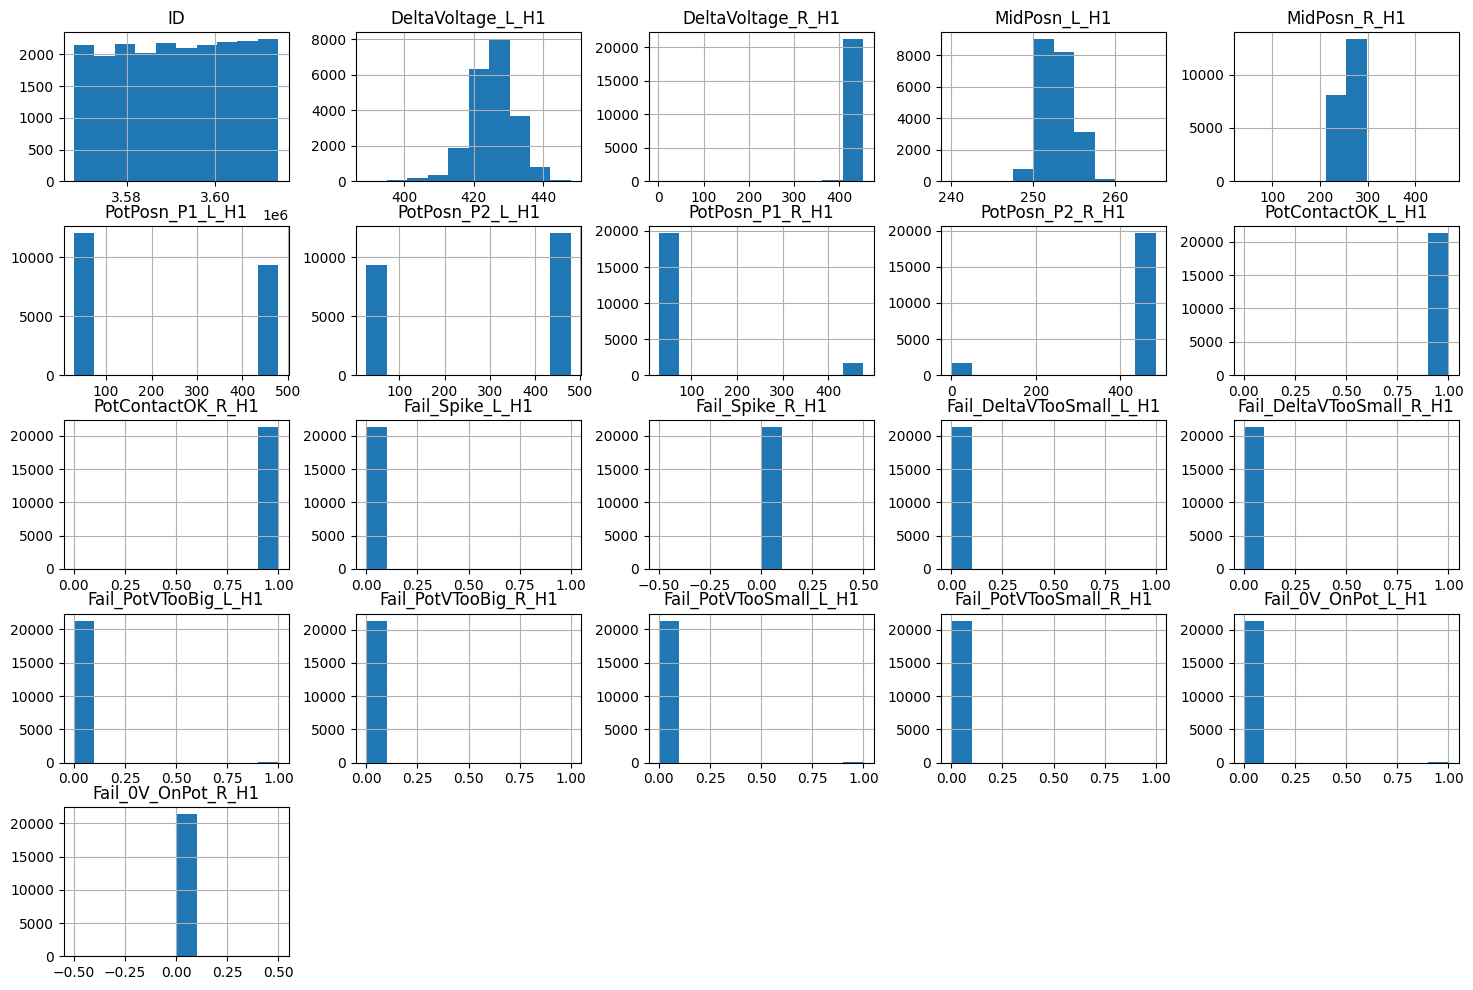

In [ ]:
#histogram

import matplotlib.pyplot as plt

Head_1.hist(figsize=(18,12))

plt.show()

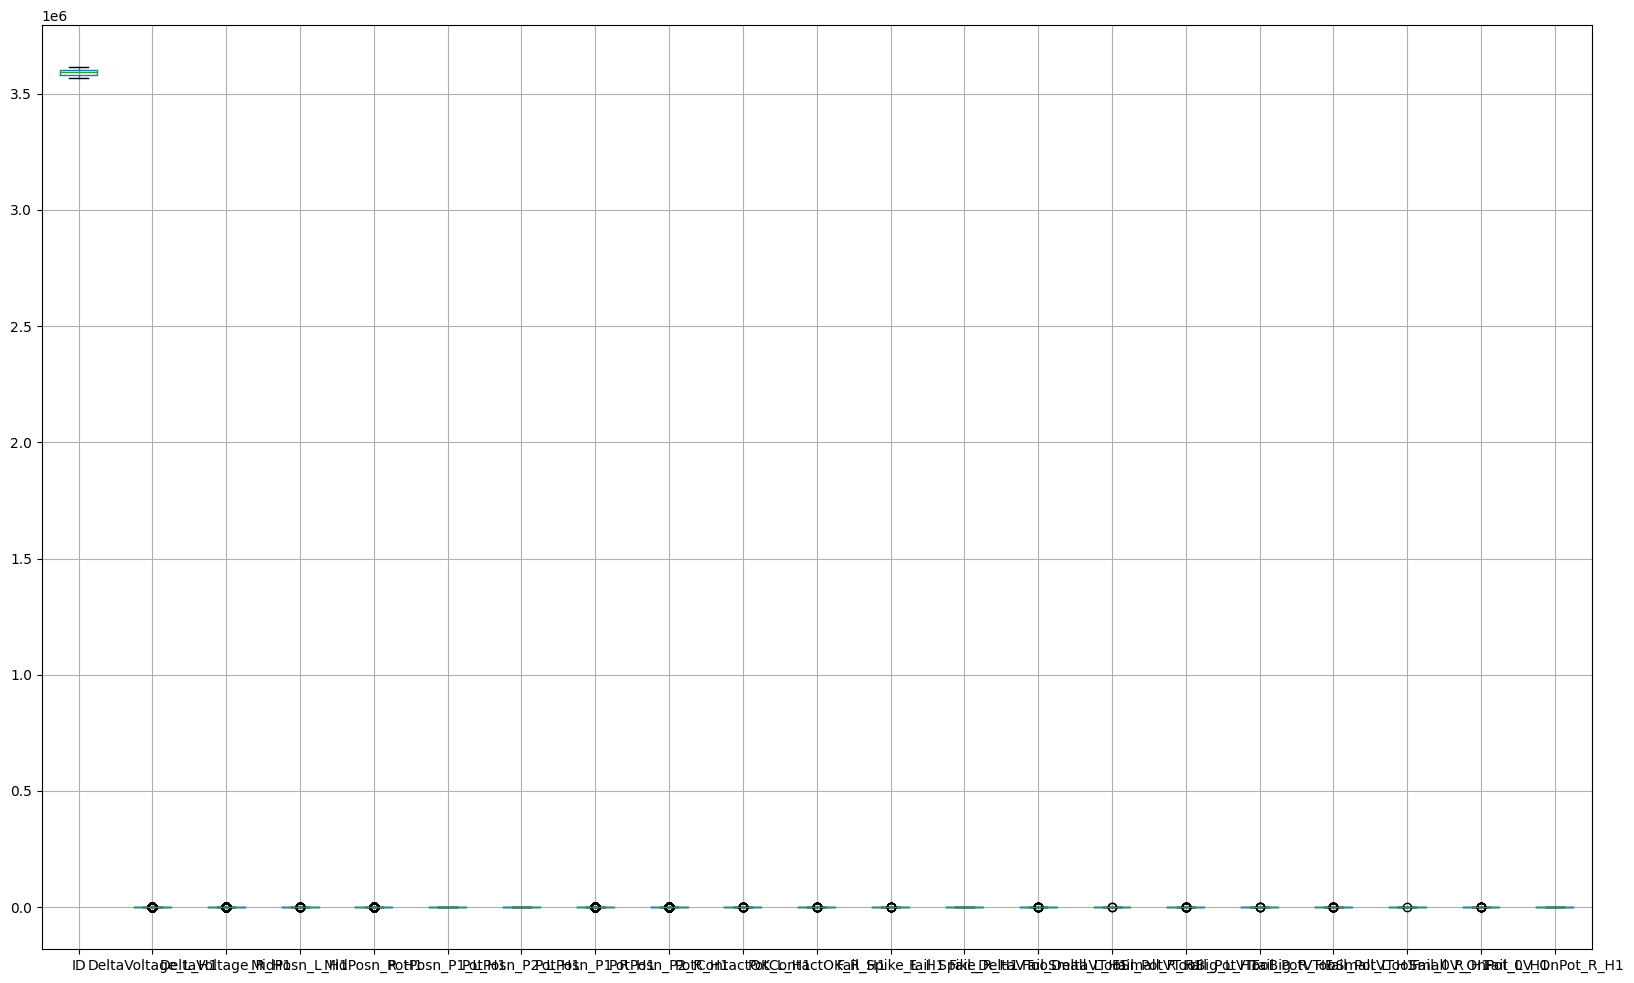

In [ ]:
#boxplot

Head_1.boxplot(figsize=(20,12))

plt.show()

The boxplot diagram due to scaling was not able to show insight.

We will break the dataset down into the measured values against the different Boolean columns

**PotContactOK_L_H1 analysis**

Create new dataframes for each boolean column and the measurement columns

In [ ]:
#PotContactOK_L_H1 dataframe

df_PCOK_L_H1 = Head_1.filter(['PotContactOK_L_H1', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPson_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPson_P1_R_H1', 'PotPson_P2_R_H1'])

print(df_PCOK_L_H1)

       PotContactOK_L_H1  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
0                      1                423                428           253   
1                      1                411                422           249   
2                      1                419                427           250   
3                      1                419                425           252   
4                      1                419                421           252   
...                  ...                ...                ...           ...   
21348                  1                432                428           253   
21349                  1                430                429           254   
21350                  1                433                433           254   
21351                  1                432                434           253   
21352                  1                426                435           256   

       MidPosn_R_H1  PotPosn_P2_L_H1  


Create histograms for the dataframe

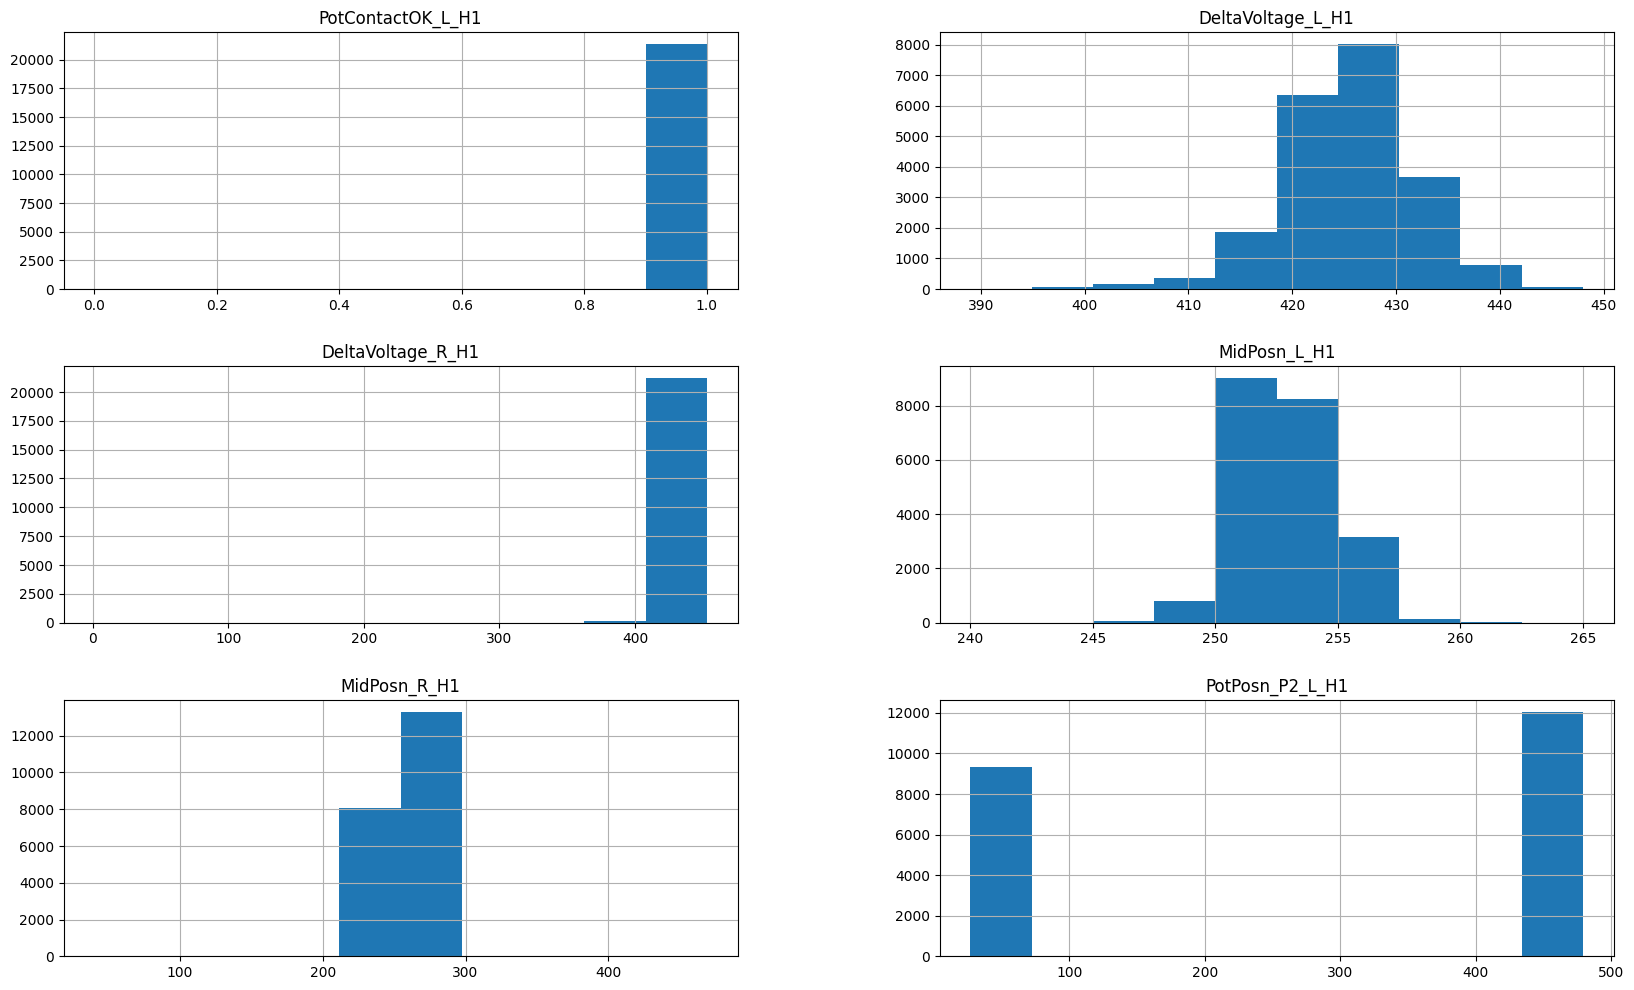

In [ ]:
df_PCOK_L_H1.hist(figsize=(20,12))

plt.show()

The histograms show DeltaVoltage_L_H1 and MidPosn_L_H1 data is spread in a normal distribution. So these features will be considered for modelling for PotContactOK_L_H1

We will try Boxplots now

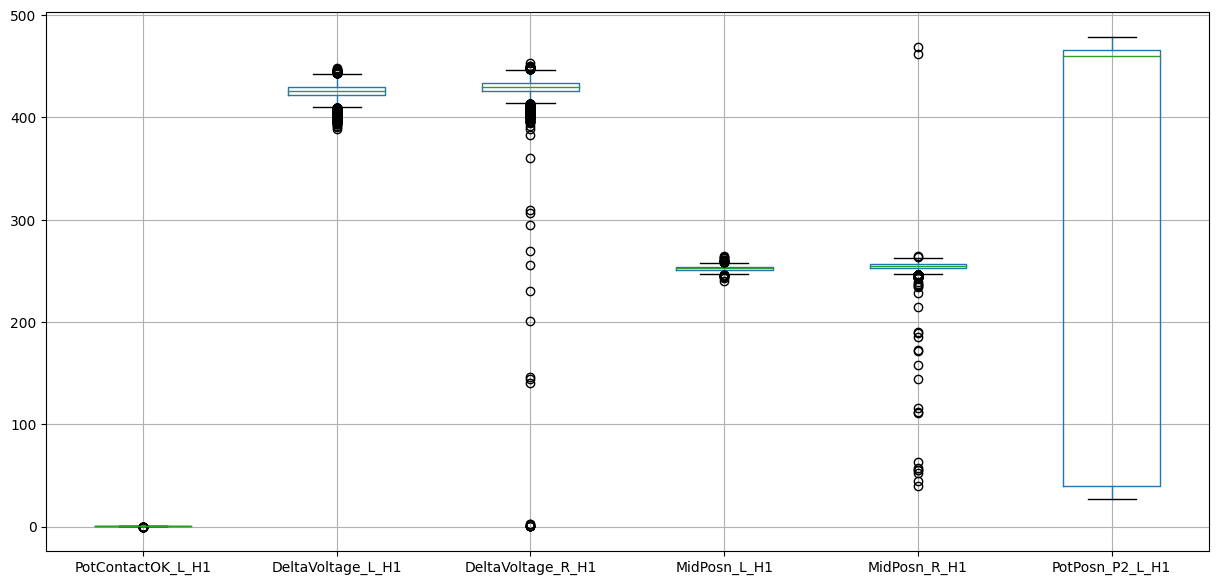

In [ ]:
df_PCOK_L_H1.boxplot(figsize=(15,7))

plt.show()

There are some outliers for DeltaVoltage_R_H1, DeltaVoltage_L_H1, and MidPosn_R_H1. We will remove them and run the boxplot again.

In [ ]:
Q1 = df_PCOK_L_H1['DeltaVoltage_R_H1'].quantile(0.25)
Q3 = df_PCOK_L_H1['DeltaVoltage_R_H1'].quantile(0.75)

IQR = Q3-Q1

#define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers from the DataFrame

no_outliers_df_PCOK_L_H1 = df_PCOK_L_H1[(df_PCOK_L_H1['DeltaVoltage_R_H1'] >= lower_bound) & (df_PCOK_L_H1['DeltaVoltage_R_H1'] <= upper_bound)]

We will run the boxplot on the new dataframe

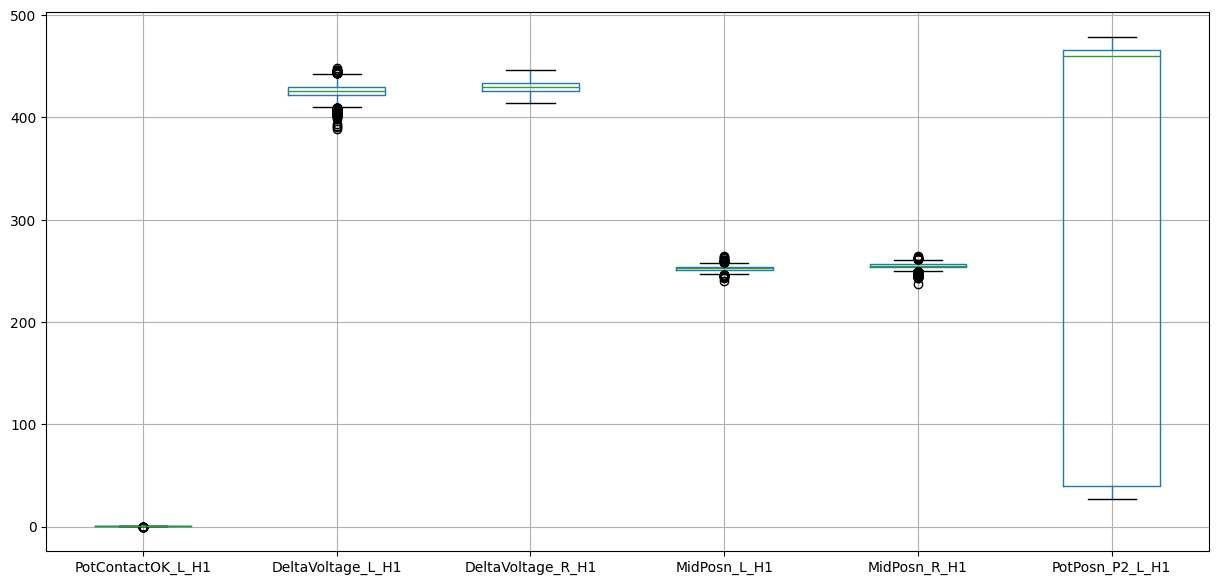

In [ ]:
no_outliers_df_PCOK_L_H1.boxplot(figsize=(15,7))

plt.show()

The majority of outliers removed from the dataframe

We will now carry out a correlation analysis on the dataframe

In [ ]:
#correlation analysis

correlation_matrix = no_outliers_df_PCOK_L_H1.corr()

#Display the results

correlation_matrix

,PotContactOK_L_H1,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P2_L_H1
PotContactOK_L_H1,1.000000,0.002066,-0.003441,0.006394,0.001768,0.008394
DeltaVoltage_L_H1,0.002066,1.000000,0.712152,0.149339,0.068006,-0.175563
DeltaVoltage_R_H1,-0.003441,0.712152,1.000000,0.152950,0.220090,-0.041492
MidPosn_L_H1,0.006394,0.149339,0.152950,1.000000,0.147198,0.113212
MidPosn_R_H1,0.001768,0.068006,0.220090,0.147198,1.000000,0.267727
PotPosn_P2_L_H1,0.008394,-0.175563,-0.041492,0.113212,0.267727,1.000000


The correlation matrix indicates that there is poor correlation between the features except for DeltaVoltage_R_H1 and DeltaVoltage_L_H1 (0.712152).

**The analysis process will be carried out again but this time with all the boolean columns rather than a single one**

In [ ]:
analysis_df_H1 = Head_1.copy()

analysis_df_H1

,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,PotContactOK_L_H1,...,Fail_Spike_L_H1,Fail_Spike_R_H1,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1
0,3614233,423,428,253,256,42,465,42,470,1,...,0,0,0,0,0,0,0,0,1,0
1,3614229,411,422,249,257,44,455,46,468,1,...,0,0,0,0,0,0,0,0,0,0
2,3614225,419,427,250,258,41,460,45,472,1,...,0,0,0,0,0,0,0,0,0,0
3,3614224,419,425,252,256,43,462,44,469,1,...,0,0,0,0,0,0,0,0,0,0
4,3614223,419,421,252,256,43,462,46,467,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,3568092,432,428,253,255,37,469,41,469,1,...,0,0,0,0,0,0,0,0,0,0
21349,3568090,430,429,254,256,39,469,42,471,1,...,0,0,0,0,0,0,0,0,0,0
21350,3568087,433,433,254,254,38,471,38,471,1,...,0,0,0,0,0,0,0,0,0,0
21351,3568085,432,434,253,256,37,469,39,473,1,...,0,0,0,0,0,0,0,0,0,0


Create histograms of dataframe

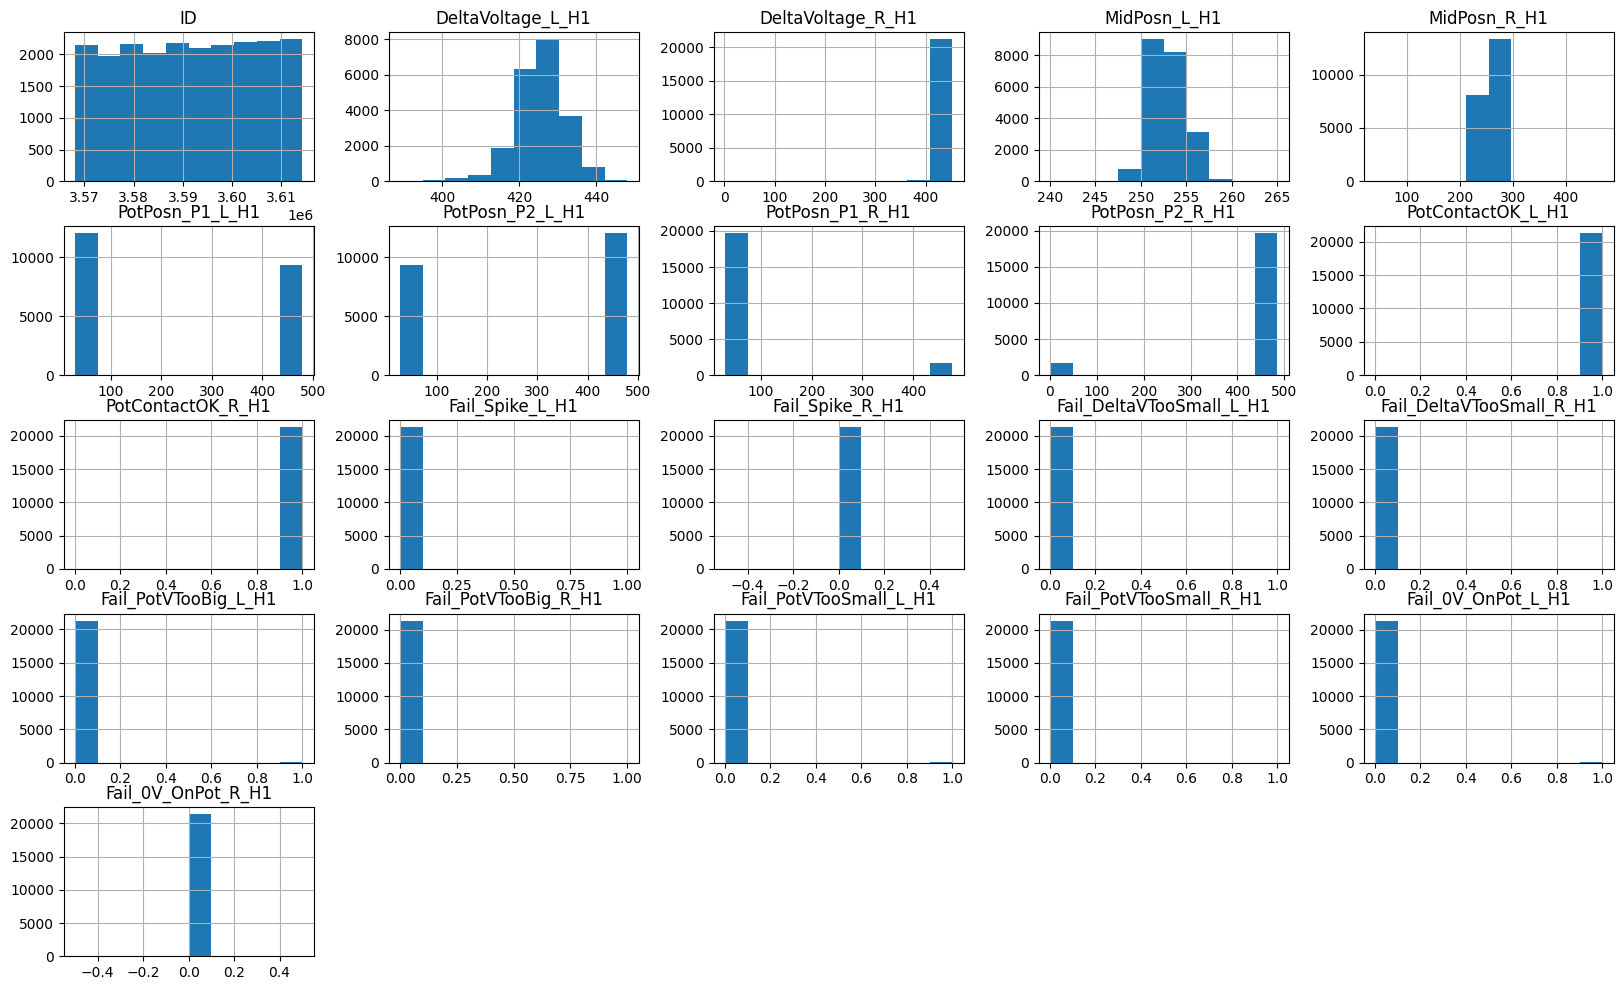

In [ ]:
analysis_df_H1.hist(figsize=(20,12))

plt.show()

DeltaVoltage_L_H1 and MidPosn_L_H1 graphs show a normal distribution curve. The MidPosn_R_H1 graph shows a normal distribution curve to an extent. The other features are boolean and showing distribution as expected.

We will try boxplot graphs for this dataframe.

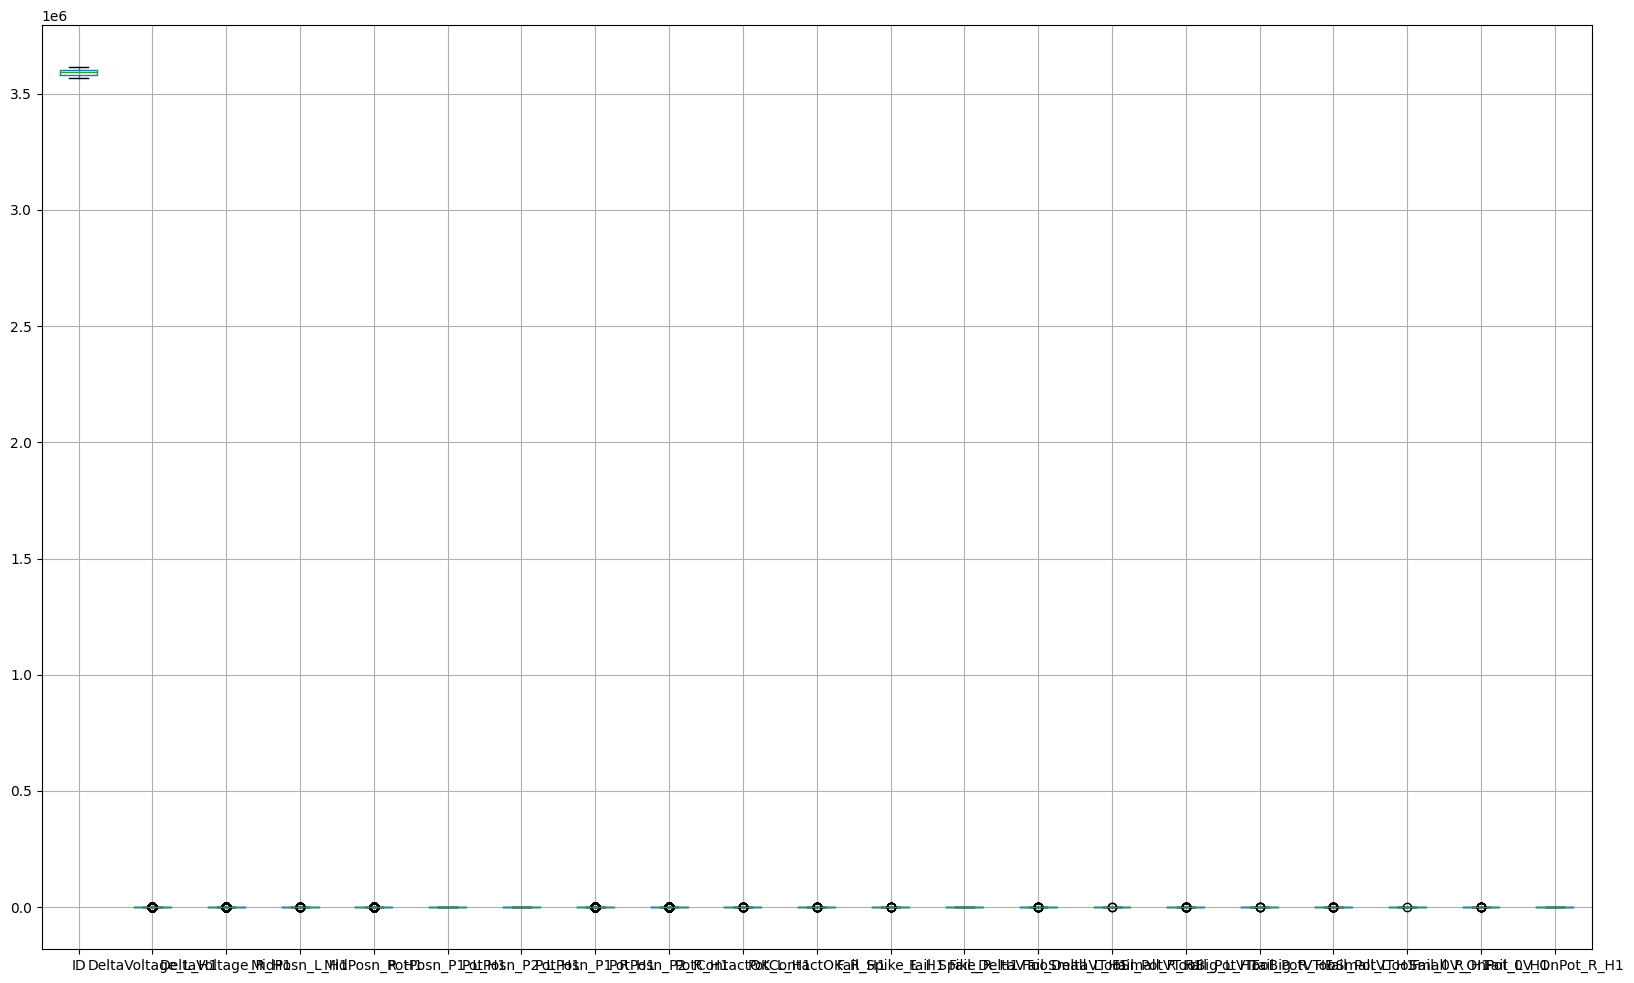

In [ ]:
analysis_df_H1.boxplot(figsize=(20,12))

plt.show()

Due to scaling there is no indication of pattern or trend within the boxplot graph.

We will try the correlation matrix now.

In [ ]:
#correlation analysis

correlation_matrix = analysis_df_H1.corr()

#Display the results

correlation_matrix

,ID,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P1_L_H1,PotPosn_P2_L_H1,PotPosn_P1_R_H1,PotPosn_P2_R_H1,PotContactOK_L_H1,...,Fail_Spike_L_H1,Fail_Spike_R_H1,Fail_DeltaVTooSmall_L_H1,Fail_DeltaVTooSmall_R_H1,Fail_PotVTooBig_L_H1,Fail_PotVTooBig_R_H1,Fail_PotVTooSmall_L_H1,Fail_PotVTooSmall_R_H1,Fail_0V_OnPot_L_H1,Fail_0V_OnPot_R_H1
ID,1.000000,-0.165860,-0.068849,-0.069392,0.014549,-0.025938,0.024688,-0.152165,0.148650,-0.026815,...,-0.007929,NaN,-0.036701,0.014180,-0.028436,0.012642,-0.033044,0.003802,-0.005295,NaN
DeltaVoltage_L_H1,-0.165860,1.000000,0.411194,0.167242,0.040850,0.195271,-0.191995,-0.068337,0.069556,0.004057,...,-0.005153,NaN,-0.010534,0.000633,0.002494,-0.012206,-0.007849,0.004640,-0.001407,NaN
DeltaVoltage_R_H1,-0.068849,0.411194,1.000000,0.100206,0.525610,0.031156,-0.029353,-0.026400,0.075012,-0.001614,...,-0.049084,NaN,-0.001639,-0.138748,0.003409,-0.116280,-0.001458,0.005468,-0.002465,NaN
MidPosn_L_H1,-0.069392,0.167242,0.100206,1.000000,0.079544,-0.086567,0.103668,-0.082012,0.087072,0.007652,...,-0.002742,NaN,-0.013541,-0.006143,-0.018574,0.002367,-0.003731,-0.002502,-0.006407,NaN
MidPosn_R_H1,0.014549,0.040850,0.525610,0.079544,1.000000,-0.145004,0.146168,-0.304146,0.388321,0.001652,...,-0.054785,NaN,-0.002152,-0.143860,0.001108,-0.114364,-0.003224,-0.013252,0.001011,NaN
PotPosn_P1_L_H1,-0.025938,0.195271,0.031156,-0.086567,-0.145004,1.000000,-0.999850,-0.051091,0.035449,-0.007402,...,-0.019973,NaN,0.002609,0.010931,0.013530,0.001947,-0.007332,0.007810,-0.000410,NaN
PotPosn_P2_L_H1,0.024688,-0.191995,-0.029353,0.103668,0.146168,-0.999850,1.000000,0.049548,-0.033841,0.007495,...,0.019887,NaN,-0.002867,-0.011044,-0.013867,-0.001919,0.007265,-0.007858,0.000296,NaN
PotPosn_P1_R_H1,-0.152165,-0.068337,-0.026400,-0.082012,-0.304146,-0.051091,0.049548,1.000000,-0.995565,-0.007792,...,0.016583,NaN,0.001228,-0.002687,-0.001956,-0.003588,0.011665,0.023616,-0.007353,NaN
PotPosn_P2_R_H1,0.148650,0.069556,0.075012,0.087072,0.388321,0.035449,-0.033841,-0.995565,1.000000,0.007632,...,-0.021216,NaN,-0.001331,-0.010995,0.002017,-0.007336,-0.011557,-0.024056,0.007209,NaN
PotContactOK_L_H1,-0.026815,0.004057,-0.001614,0.007652,0.001652,-0.007402,0.007495,-0.007792,0.007632,1.000000,...,0.000852,NaN,0.001232,0.000363,0.001430,0.000513,0.001453,0.000257,0.000961,NaN


The following features had a negative correlation:

PotPosn_P2_L_H1 + PotPosn_P1_L_H1 (-0.9)

PotPosn_P2_R_H1 + PotPosn_P1_R_H1 (-0.9)

The following features had a positive correlation:

PotContactOK_L_H1 + PotContactOK_R_H1 (0.93)

Fail_DeltaVTooSmall_R_H1 + Fail_PotVTooBig_R_H1 (0.7)



**PotContactOK_R_H1 analysis**

Create a new dataframe containing PotContactOK_R_H1 and all the measurement columns; DeltaVoltage_L_H1, DeltaVoltage_R_H1, MidPosn_L_H1, MidPosn_R_H1, PotPosn_P1_L_H1, PotPosn_P2_L_H1, PotPosn_P1_R_H1, PotPosn_P2_R_H1

In [ ]:
#PotContactOK_R_H1 dataframe

df_PCOK_R_H1 = Head_1.filter(['PotContactOK_R_H1', 'DeltaVoltage_L_H1', 'DeltaVoltage_R_H1', 'MidPosn_L_H1', 'MidPosn_R_H1', 'PotPson_P1_L_H1', 'PotPosn_P2_L_H1', 'PotPson_P1_R_H1', 'PotPson_P2_R_H1'])

print(df_PCOK_R_H1)

       PotContactOK_R_H1  DeltaVoltage_L_H1  DeltaVoltage_R_H1  MidPosn_L_H1  \
0                      1                423                428           253   
1                      1                411                422           249   
2                      1                419                427           250   
3                      1                419                425           252   
4                      1                419                421           252   
...                  ...                ...                ...           ...   
21348                  1                432                428           253   
21349                  1                430                429           254   
21350                  1                433                433           254   
21351                  1                432                434           253   
21352                  1                426                435           256   

       MidPosn_R_H1  PotPosn_P2_L_H1  


Create a histogram for the dataframe

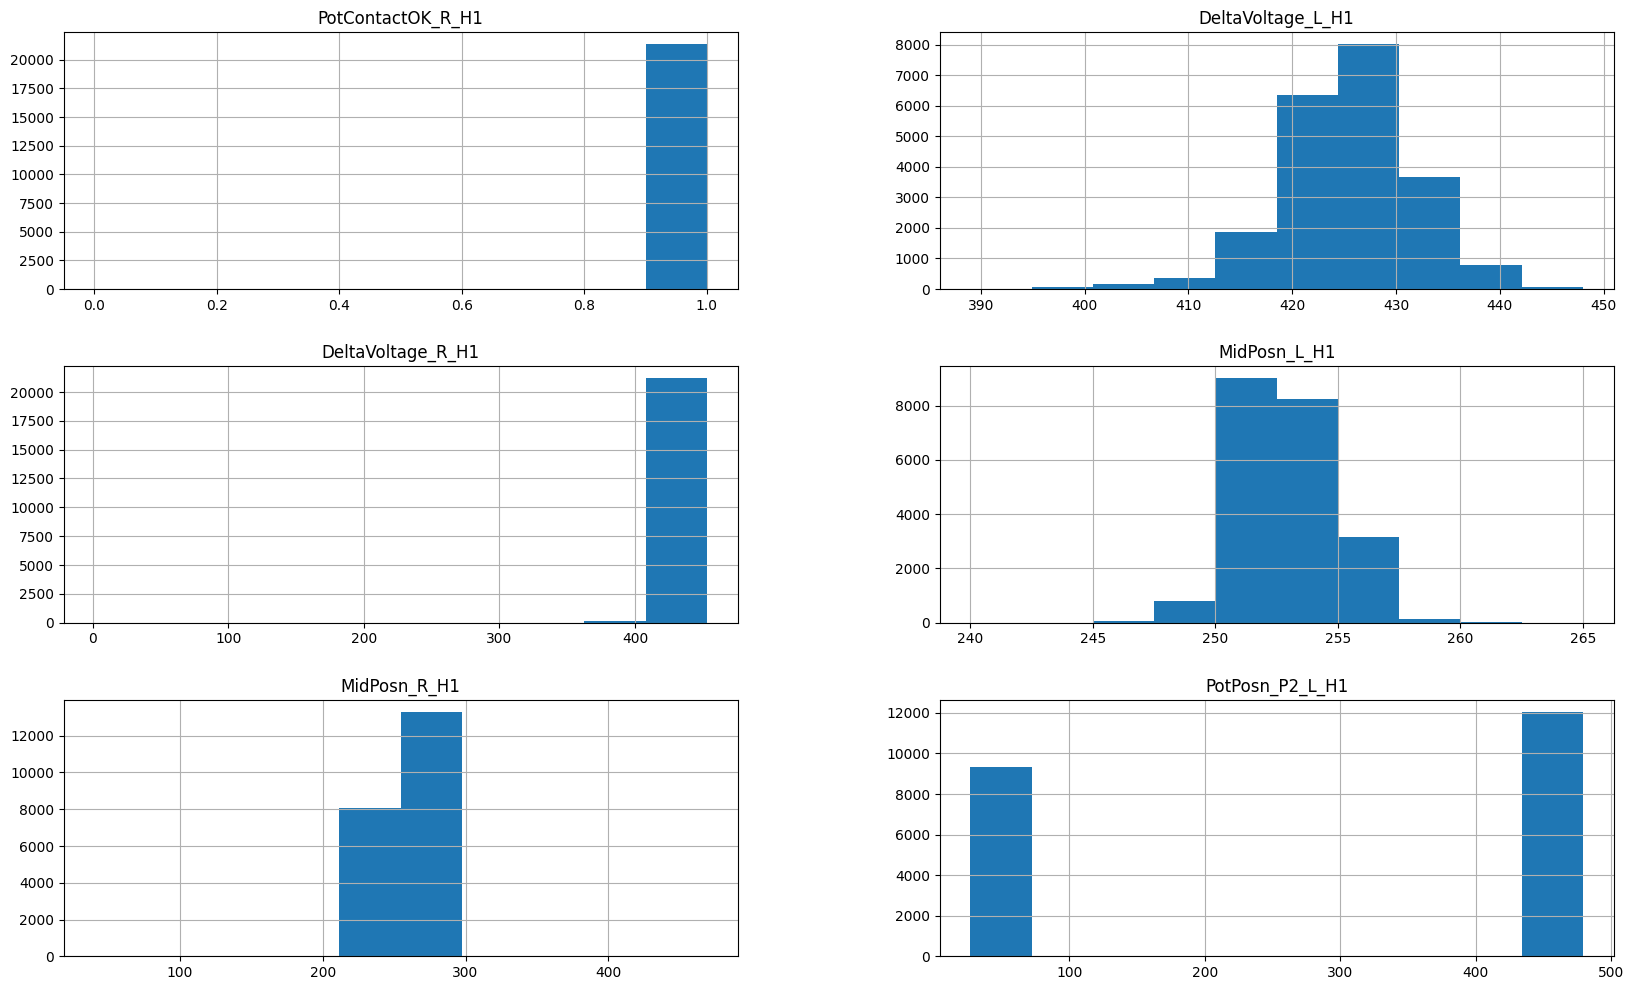

In [ ]:
df_PCOK_R_H1.hist(figsize=(20,12))

plt.show()

Create a boxplot of the dataframe

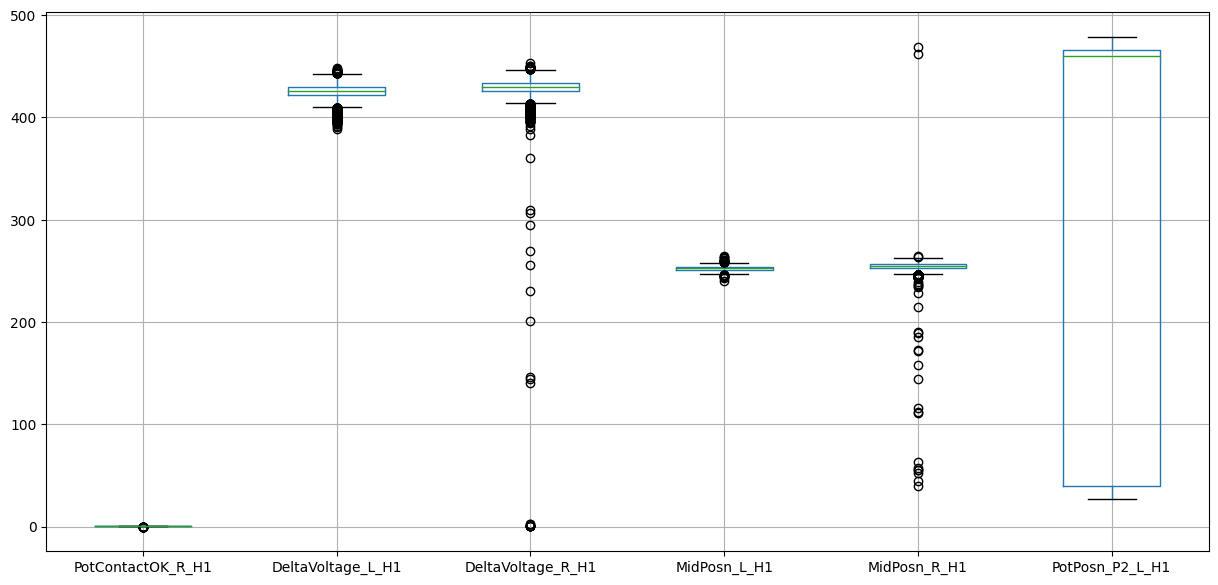

In [ ]:
df_PCOK_R_H1.boxplot(figsize=(15,7))

plt.show()

No difference when compared against the measured values versus the boolean value PotContactOK_R_H1 and the boxplot graph created for PotContactOK_L_H1

The correlation matrix for this dataframe is next to be created

In [ ]:
#correlation analysis

correlation_matrix = df_PCOK_R_H1.corr()

#Display the results

correlation_matrix

,PotContactOK_R_H1,DeltaVoltage_L_H1,DeltaVoltage_R_H1,MidPosn_L_H1,MidPosn_R_H1,PotPosn_P2_L_H1
PotContactOK_R_H1,1.000000,0.008332,0.000729,0.002793,-0.001430,0.004786
DeltaVoltage_L_H1,0.008332,1.000000,0.411194,0.167242,0.040850,-0.191995
DeltaVoltage_R_H1,0.000729,0.411194,1.000000,0.100206,0.525610,-0.029353
MidPosn_L_H1,0.002793,0.167242,0.100206,1.000000,0.079544,0.103668
MidPosn_R_H1,-0.001430,0.040850,0.525610,0.079544,1.000000,0.146168
PotPosn_P2_L_H1,0.004786,-0.191995,-0.029353,0.103668,0.146168,1.000000


from matplotlib import pyplot as plt
correlation_matrix['PotContactOK_R_H1'].plot(kind='hist', bins=20, title='PotContactOK_R_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['DeltaVoltage_L_H1'].plot(kind='hist', bins=20, title='DeltaVoltage_L_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['DeltaVoltage_R_H1'].plot(kind='hist', bins=20, title='DeltaVoltage_R_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['MidPosn_L_H1'].plot(kind='hist', bins=20, title='MidPosn_L_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='PotContactOK_R_H1', y='DeltaVoltage_L_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='DeltaVoltage_L_H1', y='DeltaVoltage_R_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='DeltaVoltage_R_H1', y='MidPosn_L_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='MidPosn_L_H1', y='MidPosn_R_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['PotContactOK_R_H1'].plot(kind='line', figsize=(8, 4), title='PotContactOK_R_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['DeltaVoltage_L_H1'].plot(kind='line', figsize=(8, 4), title='DeltaVoltage_L_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['DeltaVoltage_R_H1'].plot(kind='line', figsize=(8, 4), title='DeltaVoltage_R_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['MidPosn_L_H1'].plot(kind='line', figsize=(8, 4), title='MidPosn_L_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

No strong correlation positive or negative for the boolean value and the measurement features